In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [2]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_eeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')
data_eeg_3 = pd.read_csv(path+'3\data_s3_rp-win_-1-0_srate-250_modality-eeg.csv')
data_eeg_4 = pd.read_csv(path+'4\data_s4_rp-win_-1-0_srate-250_modality-eeg.csv')
data_eeg_5 = pd.read_csv(path+'5\data_s5_rp-win_-1-0_srate-250_modality-eeg.csv')
data_eeg_6 = pd.read_csv(path+'6\data_s6_rp-win_-1-0_srate-250_modality-eeg.csv')
data_eeg_7 = pd.read_csv(path+'7\data_s7_rp-win_-1-0_srate-250_modality-eeg.csv')

# EEG Window 
win_eeg = 25
win_eeg_scaled_11 = np.arange(len(data_eeg_11))//win_eeg
win_eeg_scaled_3 = np.arange(len(data_eeg_3))//win_eeg
win_eeg_scaled_4 = np.arange(len(data_eeg_4))//win_eeg
win_eeg_scaled_5 = np.arange(len(data_eeg_5))//win_eeg
win_eeg_scaled_6 = np.arange(len(data_eeg_6))//win_eeg
win_eeg_scaled_7 = np.arange(len(data_eeg_7))//win_eeg

In [3]:
#EEG DataFrames
win_eeg_mean_11 = data_eeg_11.groupby(win_eeg_scaled_11).mean() 
df_eeg_11 = win_eeg_mean_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_11.columns[3:].tolist())
df_eeg_11.reset_index(inplace=True)

win_eeg_mean_3 = data_eeg_3.groupby(win_eeg_scaled_3).mean() 
df_eeg_3 = win_eeg_mean_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_3.columns[3:].tolist())
df_eeg_3.reset_index(inplace=True)

win_eeg_mean_4 = data_eeg_4.groupby(win_eeg_scaled_4).mean() 
df_eeg_4 = win_eeg_mean_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_4.columns[3:].tolist())
df_eeg_4.reset_index(inplace=True)

win_eeg_mean_5 = data_eeg_5.groupby(win_eeg_scaled_5).mean() 
df_eeg_5 = win_eeg_mean_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_5.columns[3:].tolist())
df_eeg_5.reset_index(inplace=True)

win_eeg_mean_6 = data_eeg_6.groupby(win_eeg_scaled_6).mean() 
df_eeg_6 = win_eeg_mean_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_6.columns[3:].tolist())
df_eeg_6.reset_index(inplace=True)

win_eeg_mean_7 = data_eeg_7.groupby(win_eeg_scaled_7).mean() 
df_eeg_7 = win_eeg_mean_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_7.columns[3:].tolist())
df_eeg_7.reset_index(inplace=True)

In [4]:
# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_11 = df_eeg_11.iloc[:,2:].values
yeeg_11 = np.asarray(df_eeg_11['rp_class'])
clf_eeg_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_11.fit(Xeeg_11, yeeg_11)
pred_y_eeg_11 = cross_val_predict(clf_eeg_11, Xeeg_11, yeeg_11, cv=kfolds)

Xeeg_3 = df_eeg_3.iloc[:,2:].values
yeeg_3 = np.asarray(df_eeg_3['rp_class'])
clf_eeg_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_3.fit(Xeeg_3, yeeg_3)
pred_y_eeg_3 = cross_val_predict(clf_eeg_3, Xeeg_3, yeeg_3, cv=kfolds)

Xeeg_4 = df_eeg_4.iloc[:,2:].values
yeeg_4 = np.asarray(df_eeg_4['rp_class'])
clf_eeg_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_4.fit(Xeeg_4, yeeg_4)
pred_y_eeg_4 = cross_val_predict(clf_eeg_4, Xeeg_4, yeeg_4, cv=kfolds)

Xeeg_5 = df_eeg_5.iloc[:,2:].values
yeeg_5 = np.asarray(df_eeg_5['rp_class'])
clf_eeg_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_5.fit(Xeeg_5, yeeg_5)
pred_y_eeg_5 = cross_val_predict(clf_eeg_5, Xeeg_5, yeeg_5, cv=kfolds)

Xeeg_6 = df_eeg_6.iloc[:,2:].values
yeeg_6 = np.asarray(df_eeg_6['rp_class'])
clf_eeg_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_6.fit(Xeeg_6, yeeg_6)
pred_y_eeg_6 = cross_val_predict(clf_eeg_6, Xeeg_6, yeeg_6, cv=kfolds)

Xeeg_7 = df_eeg_7.iloc[:,2:].values
yeeg_7 = np.asarray(df_eeg_7['rp_class'])
clf_eeg_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_7.fit(Xeeg_7, yeeg_7)
pred_y_eeg_7 = cross_val_predict(clf_eeg_7, Xeeg_7, yeeg_7, cv=kfolds)

In [5]:
# Averaged confusion matrix
cm_eeg_11 = confusion_matrix(y_true=yeeg_11, y_pred=pred_y_eeg_11)
cm_eeg_3 = confusion_matrix(y_true=yeeg_3, y_pred=pred_y_eeg_3)
cm_eeg_4 = confusion_matrix(y_true=yeeg_4, y_pred=pred_y_eeg_4)
cm_eeg_5 = confusion_matrix(y_true=yeeg_5, y_pred=pred_y_eeg_5)
cm_eeg_6 = confusion_matrix(y_true=yeeg_6, y_pred=pred_y_eeg_6)
cm_eeg_7 = confusion_matrix(y_true=yeeg_7, y_pred=pred_y_eeg_7)

mean_cm = np.zeros((2, 2))
std_cm = np.zeros((2, 2))
mean_cm[0,0] = np.mean([cm_eeg_11[0,0], cm_eeg_3[0,0], cm_eeg_4[0,0], cm_eeg_5[0,0], cm_eeg_6[0,0],cm_eeg_7[0,0]])
mean_cm[0,1] = np.mean([cm_eeg_11[0,1], cm_eeg_3[0,1], cm_eeg_4[0,1], cm_eeg_5[0,1], cm_eeg_6[0,1],cm_eeg_7[0,1]])
mean_cm[1,0] = np.mean([cm_eeg_11[1,0], cm_eeg_3[1,0], cm_eeg_4[1,0], cm_eeg_5[1,0], cm_eeg_6[1,0],cm_eeg_7[1,0]])
mean_cm[1,1] = np.mean([cm_eeg_11[1,1], cm_eeg_3[1,1], cm_eeg_4[1,1], cm_eeg_5[1,1], cm_eeg_6[1,1],cm_eeg_7[1,1]])

std_cm[0,0] = np.std([cm_eeg_11[0,0], cm_eeg_3[0,0], cm_eeg_4[0,0], cm_eeg_5[0,0], cm_eeg_6[0,0],cm_eeg_7[0,0]])
std_cm[0,1] = np.std([cm_eeg_11[0,1], cm_eeg_3[0,1], cm_eeg_4[0,1], cm_eeg_5[0,1], cm_eeg_6[0,1],cm_eeg_7[0,1]])
std_cm[1,0] = np.std([cm_eeg_11[1,0], cm_eeg_3[1,0], cm_eeg_4[1,0], cm_eeg_5[1,0], cm_eeg_6[1,0],cm_eeg_7[1,0]])
std_cm[1,1] = np.std([cm_eeg_11[1,1], cm_eeg_3[1,1], cm_eeg_4[1,1], cm_eeg_5[1,1], cm_eeg_6[1,1],cm_eeg_7[1,1]])

Text(0.5, 22.5, 'Predicted label')

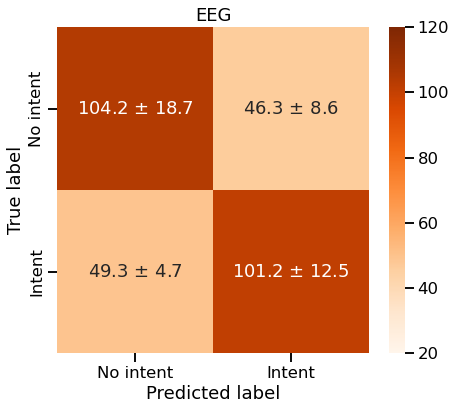

In [6]:
#Can't plot fucking std deviation in the same time
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
a = sns.heatmap(mean_cm, ax = ax, annot=np.array([['%0.1f $\pm$ %0.1f' % (mean_cm[0,0], std_cm[0,0]),'%0.1f $\pm$ %0.1f' % (mean_cm[0,1], std_cm[0,1])],['%0.1f $\pm$ %0.1f' % (mean_cm[1,0], std_cm[1,0]),'%0.1f $\pm$ %0.1f' % (mean_cm[1,1], std_cm[1,1])]]), cmap='Oranges', fmt="", vmin=20, vmax=120, xticklabels=["No intent", "Intent"], yticklabels=["No intent", "Intent"])
a.set_title('EEG')
plt.ylabel('True label')
plt.xlabel('Predicted label')

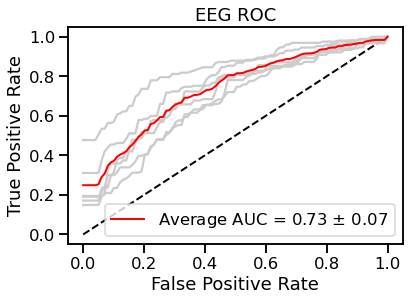

In [7]:
tprs_11 = []
aucs_11 = []
mean_fpr_11 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_11,yeeg_11):
    prediction_11 = clf_eeg_11.fit(Xeeg_11[train],yeeg_11[train]).predict_proba(Xeeg_11[test])
    fpr_11, tpr_11, t_11 = roc_curve(yeeg_11[test], prediction_11[:, 1], pos_label=2.0)
    tprs_11.append(np.interp(mean_fpr_11, fpr_11, tpr_11))
    roc_auc_11 = auc(fpr_11, tpr_11)
    aucs_11.append(roc_auc_11)
    i= i+1

tprs_3 = []
aucs_3 = []
mean_fpr_3 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_3,yeeg_3):
    prediction_3 = clf_eeg_3.fit(Xeeg_3[train],yeeg_3[train]).predict_proba(Xeeg_3[test])
    fpr_3, tpr_3, t_3 = roc_curve(yeeg_3[test], prediction_3[:, 1], pos_label=2.0)
    tprs_3.append(np.interp(mean_fpr_3, fpr_3, tpr_3))
    roc_auc_3 = auc(fpr_3, tpr_3)
    aucs_3.append(roc_auc_3)
    i= i+1

tprs_4 = []
aucs_4 = []
mean_fpr_4 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_4,yeeg_4):
    prediction_4 = clf_eeg_4.fit(Xeeg_4[train],yeeg_4[train]).predict_proba(Xeeg_4[test])
    fpr_4, tpr_4, t_4 = roc_curve(yeeg_4[test], prediction_4[:, 1], pos_label=2.0)
    tprs_4.append(np.interp(mean_fpr_4, fpr_4, tpr_4))
    roc_auc_4 = auc(fpr_4, tpr_4)
    aucs_4.append(roc_auc_4)
    i= i+1
    
tprs_5 = []
aucs_5 = []
mean_fpr_5 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_5,yeeg_5):
    prediction_5 = clf_eeg_5.fit(Xeeg_5[train],yeeg_5[train]).predict_proba(Xeeg_5[test])
    fpr_5, tpr_5, t_5 = roc_curve(yeeg_5[test], prediction_5[:, 1], pos_label=2.0)
    tprs_5.append(np.interp(mean_fpr_5, fpr_5, tpr_5))
    roc_auc_5 = auc(fpr_5, tpr_5)
    aucs_5.append(roc_auc_5)
    i= i+1
    
tprs_6 = []
aucs_6 = []
mean_fpr_6 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_6,yeeg_6):
    prediction_6 = clf_eeg_6.fit(Xeeg_6[train],yeeg_6[train]).predict_proba(Xeeg_6[test])
    fpr_6, tpr_6, t_6 = roc_curve(yeeg_6[test], prediction_6[:, 1], pos_label=2.0)
    tprs_6.append(np.interp(mean_fpr_6, fpr_6, tpr_6))
    roc_auc_6 = auc(fpr_6, tpr_6)
    aucs_6.append(roc_auc_6)
    i= i+1
    
tprs_7 = []
aucs_7 = []
mean_fpr_7 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xeeg_7,yeeg_7):
    prediction_7 = clf_eeg_7.fit(Xeeg_7[train],yeeg_7[train]).predict_proba(Xeeg_7[test])
    fpr_7, tpr_7, t_7 = roc_curve(yeeg_7[test], prediction_7[:, 1], pos_label=2.0)
    tprs_7.append(np.interp(mean_fpr_7, fpr_7, tpr_7))
    roc_auc_7 = auc(fpr_7, tpr_7)
    aucs_7.append(roc_auc_7)
    i= i+1

  
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_11 = np.mean(tprs_11, axis=0)
mean_auc_11 = auc(mean_fpr_11, mean_tpr_11)
std_auc_11 = np.std(aucs_11)
plt.plot(mean_fpr_11, mean_tpr_11, color='0.8')

mean_tpr_3 = np.mean(tprs_3, axis=0)
mean_auc_3 = auc(mean_fpr_3, mean_tpr_3)
std_auc_3 = np.std(aucs_3)
plt.plot(mean_fpr_3, mean_tpr_3, color='0.8')

mean_tpr_4 = np.mean(tprs_4, axis=0)
mean_auc_4 = auc(mean_fpr_4, mean_tpr_4)
std_auc_4 = np.std(aucs_4)
plt.plot(mean_fpr_4, mean_tpr_4, color='0.8')

mean_tpr_5 = np.mean(tprs_5, axis=0)
mean_auc_5 = auc(mean_fpr_5, mean_tpr_5)
std_auc_5 = np.std(aucs_5)
plt.plot(mean_fpr_5, mean_tpr_5, color='0.8')

mean_tpr_6 = np.mean(tprs_6, axis=0)
mean_auc_6 = auc(mean_fpr_6, mean_tpr_6)
std_auc_6 = np.std(aucs_6)
plt.plot(mean_fpr_6, mean_tpr_6, color='0.8')

mean_tpr_7 = np.mean(tprs_7, axis=0)
mean_auc_7 = auc(mean_fpr_7, mean_tpr_7)
std_auc_7 = np.std(aucs_7)
plt.plot(mean_fpr_7, mean_tpr_7, color='0.8')

mean_tpr_all = np.zeros((100))
mean_fpr_all = np.zeros((100))

for i in range(len(mean_tpr_11)):
    mean_tpr_all[i] = np.mean([mean_tpr_11[i], mean_tpr_3[i], mean_tpr_4[i], mean_tpr_5[i], mean_tpr_6[i], mean_tpr_7[i]])
    mean_fpr_all[i] = np.mean([mean_fpr_11[i], mean_fpr_3[i], mean_fpr_4[i], mean_fpr_5[i], mean_fpr_6[i], mean_fpr_7[i]])

mean_auc_all = auc(mean_fpr_all, mean_tpr_all)
std_auc_all = np.mean([std_auc_11, std_auc_3, std_auc_4, std_auc_5, std_auc_6, std_auc_7])
plt.plot(mean_fpr_all, mean_tpr_all, color='r',
         label=r'Average AUC = %0.2f $\pm$ %0.2f' % (mean_auc_all, std_auc_all),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EEG ROC')
plt.legend(loc="lower right")

plt.show()

In [12]:
aucs_7

[0.9251700680272109,
 0.8618421052631579,
 0.8717105263157894,
 0.8594771241830065,
 0.9117647058823529,
 0.8585526315789473,
 0.8809523809523809,
 0.7287581699346405,
 0.6996336996336997,
 0.75]

In [8]:
# EMG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_remg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_emg_11 = pd.concat([data_remg_11.iloc[:,:4], data_remg_11.iloc[:,4] + 0.280], axis=1)
data_emg_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

#data_remg_3 = pd.read_csv(path+'3\data_s3_rp-win_-1-0_srate-250_modality-emg.csv')
#data_emg_3 = pd.concat([data_remg_3.iloc[:,:4], data_remg_3.iloc[:,4] + 0.270], axis=1)
#data_emg_3.iloc[len(data_emg_3)//2:,3:] = (data_emg_3.iloc[len(data_emg_3)//2:,3:]/2.5) +0.0065
#data_emg_3.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

# EMG Window 
win_emg = 250
win_emg_scaled_11 = np.arange(len(data_emg_11))//win_emg
#win_emg_scaled_3 = np.arange(len(data_emg_3))//win_emg

In [9]:
def rms(values):
    return np.sqrt(sum(values**2)/len(values))

def mini(values):
    return np.min(values)

def maxi(values):
    return np.max(values)

def mav(values):
    return np.mean(abs(values))

def var(values):
    return np.var(values)

In [10]:
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']  #, 'wl'#  'mavs', 'zc', 'ssc'  (Waveform actually pretty powerful)

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)
muscle_1_3 =[None] * len(feat_list)
muscle_2_3 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_11.groupby(win_emg_scaled_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_11.groupby(win_emg_scaled_11)['Deltoïd'].apply(feat_list[i])
#    muscle_1_3[i] = data_emg_3.groupby(win_emg_scaled_3)['Biceps'].apply(feat_list[i])
#    muscle_2_3[i] = data_emg_3.groupby(win_emg_scaled_3)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

#m1_3 = pd.DataFrame(muscle_1_3, index=nfeat_list).transpose()
#m2_3 = pd.DataFrame(muscle_2_3, index=nfeat_list).transpose()
#mk_3 = {'Biceps':m1_3, 'Deltoïd':m2_3}
#muscles_3 = pd.concat([m1_3,m2_3], axis=1, keys=mk_3.keys())

c_labels_11 = data_emg_11.iloc[:,:3].groupby(win_emg_scaled_11).mean()
#c_labels_3 = data_emg_3.iloc[:,:3].groupby(win_emg_scaled_3).mean()

win_emg_mean_11 = pd.concat([c_labels_11, muscles_11], axis=1)
#win_emg_mean_3 = pd.concat([c_labels_3, muscles_3], axis=1)

In [11]:
# DataFrames
df_emg_11 = win_emg_mean_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_11.columns[3:].tolist())
df_emg_11.reset_index(inplace=True)

#df_emg_3 = win_emg_mean_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_3.columns[3:].tolist())
#df_emg_3.reset_index(inplace=True)

In [12]:
# Classifiers
Xemg_11 = df_emg_11.iloc[:,2:].values
yemg_11 = np.asarray(df_eeg_11['rp_class'])
clf_emg_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_11.fit(Xemg_11, yemg_11)
pred_y_emg_11 = cross_val_predict(clf_emg_11, Xemg_11, yemg_11, cv=kfolds)

#Xemg_3 = df_emg_3.iloc[:,2:].values
#yemg_3 = np.asarray(df_eeg_3['rp_class'])
#clf_emg_3 = LDA(solver='lsqr', shrinkage='auto')
#clf_emg_3.fit(Xemg_3, yemg_3)
#pred_y_emg_3 = cross_val_predict(clf_emg_3, Xemg_3, yemg_3, cv=kfolds)

In [13]:
# Averaged confusion matrix
cm_emg_11 = confusion_matrix(y_true=yemg_11, y_pred=pred_y_emg_11)
#cm_emg_3 = confusion_matrix(y_true=yemg_3, y_pred=pred_y_emg_3)

#mean_cm_emg = np.zeros((2, 2))
#std_cm_emg = np.zeros((2, 2))
#mean_cm_emg[0,0] = np.mean([cm_emg_11[0,0], cm_emg_3[0,0]])
#mean_cm_emg[0,1] = np.mean([cm_emg_11[0,1], cm_emg_3[0,1]])
#mean_cm_emg[1,0] = np.mean([cm_emg_11[1,0], cm_emg_3[1,0]])
#mean_cm_emg[1,1] = np.mean([cm_emg_11[1,1], cm_emg_3[1,1]])

#std_cm_emg[0,0] = np.std([cm_emg_11[0,0], cm_emg_3[0,0]])
#std_cm_emg[0,1] = np.std([cm_emg_11[0,1], cm_emg_3[0,1]])
#std_cm_emg[1,0] = np.std([cm_emg_11[1,0], cm_emg_3[1,0]])
#std_cm_emg[1,1] = np.std([cm_emg_11[1,1], cm_emg_3[1,1]])

Text(0.5, 22.5, 'Predicted label')

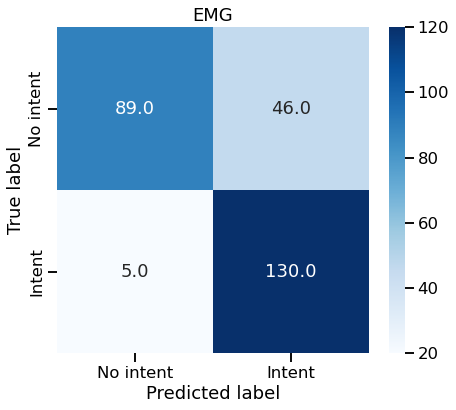

In [25]:
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
b=sns.heatmap(cm_emg_11, ax = ax, annot=np.array([['%0.1f' % (cm_emg_11[0,0]),'%0.1f' % (cm_emg_11[0,1])],
                                                  ['%0.1f' % (cm_emg_11[1,0]),'%0.1f' % (cm_emg_11[1,1])]]), 
                                                  cmap='Blues', fmt="", vmin=20, vmax=120, 
                                                  xticklabels=["No intent", "Intent"], yticklabels=["No intent", "Intent"])
b.set_title('EMG')
plt.ylabel('True label')
plt.xlabel('Predicted label')

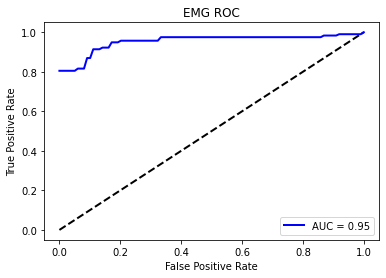

In [15]:
tprs_emg_11 = []
aucs_emg_11 = []
mean_fpr_emg_11 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(Xemg_11,yemg_11):
    prediction_emg_11 = clf_emg_11.fit(Xemg_11[train],yemg_11[train]).predict_proba(Xemg_11[test])
    fpr_emg_11, tpr_emg_11, t_emg_11 = roc_curve(yemg_11[test], prediction_emg_11[:, 1], pos_label=2.0)
    tprs_emg_11.append(np.interp(mean_fpr_emg_11, fpr_emg_11, tpr_emg_11))
    roc_auc_emg_11 = auc(fpr_emg_11, tpr_emg_11)
    aucs_emg_11.append(roc_auc_emg_11)
    i= i+1

#tprs_emg_3 = []
#aucs_emg_3 = []
#mean_fpr_emg_3 = np.linspace(0,1,100)
#i = 1
#for train,test in kfolds.split(Xemg_3,yemg_3):
#    prediction_emg_3 = clf_emg_3.fit(Xemg_3[train],yemg_3[train]).predict_proba(Xemg_3[test])
#    fpr_emg_3, tpr_emg_3, t_emg_3 = roc_curve(yemg_3[test], prediction_emg_3[:, 1], pos_label=2.0)
#    tprs_emg_3.append(np.interp(mean_fpr_emg_3, fpr_emg_3, tpr_emg_3))
 #   roc_auc_emg_3 = auc(fpr_emg_3, tpr_emg_3)
 #   aucs_emg_3.append(roc_auc_emg_3)
#   i= i+1
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_emg_11 = np.mean(tprs_emg_11, axis=0)
mean_auc_emg_11 = auc(mean_fpr_emg_11, mean_tpr_emg_11)
std_auc_emg_11 = np.std(aucs_emg_11)
plt.plot(mean_fpr_emg_11, mean_tpr_emg_11, color='b',
         label=r'AUC = %0.2f' % (mean_auc_emg_11),lw=2, alpha=1)

#mean_tpr_emg_3 = np.mean(tprs_emg_3, axis=0)
#mean_auc_emg_3 = auc(mean_fpr_emg_3, mean_tpr_emg_3)
#std_auc_emg_3 = np.std(aucs_emg_3)
#plt.plot(mean_fpr_emg_3, mean_tpr_emg_3, color='0.8')

#mean_tpr_emg_all = np.zeros((100))
#mean_fpr_emg_all = np.zeros((100))

#for i in range(len(mean_tpr_11)):
#    mean_tpr_emg_all[i] = np.mean([mean_tpr_emg_11[i], mean_tpr_emg_3[i]])
#    mean_fpr_emg_all[i] = np.mean([mean_fpr_emg_11[i], mean_fpr_emg_3[i]])

#mean_auc_emg_all = auc(mean_fpr_emg_all, mean_tpr_emg_all)
#std_auc_emg_all = np.mean([std_auc_emg_11, std_auc_emg_3])
#plt.plot(mean_fpr_emg_all, mean_tpr_emg_all, color='b',
#         label=r'AUC = %0.2f $\pm$ %0.2f' % (mean_auc_emg_11, std_auc_emg_11),lw=2, alpha=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EMG ROC')
plt.legend(loc="lower right")

plt.show()

EEG - EMG

In [16]:
# EMG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_eeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

# EMG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_remg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_emg_11 = pd.concat([data_remg_11.iloc[:,:3], data_remg_11.iloc[:,3]-0.009, data_remg_11.iloc[:,4] + 0.270], axis=1)
data_emg_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

In [17]:
# EEG Window 
win_eeg = 25
win_eeg_scaled_11 = np.arange(len(data_eeg_11))//win_eeg

# EMG Window 
win_emg = 250
win_emg_scaled_11 = np.arange(len(data_emg_11))//win_emg

In [18]:
def rms(values):
    return np.sqrt(sum(values**2)/len(values))

def mini(values):
    return np.min(values)

def maxi(values):
    return np.max(values)

def mav(values):
    return np.mean(abs(values))

def var(values):
    return np.var(values)

In [19]:
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']  #, 'wl'#  'mavs', 'zc', 'ssc'  (Waveform actually pretty powerful)

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)
muscle_1_3 =[None] * len(feat_list)
muscle_2_3 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_11.groupby(win_emg_scaled_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_11.groupby(win_emg_scaled_11)['Deltoïd'].apply(feat_list[i])
#    muscle_1_3[i] = data_emg_3.groupby(win_emg_scaled_3)['Biceps'].apply(feat_list[i])
#    muscle_2_3[i] = data_emg_3.groupby(win_emg_scaled_3)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

#m1_3 = pd.DataFrame(muscle_1_3, index=nfeat_list).transpose()
#m2_3 = pd.DataFrame(muscle_2_3, index=nfeat_list).transpose()
#mk_3 = {'Biceps':m1_3, 'Deltoïd':m2_3}
#muscles_3 = pd.concat([m1_3,m2_3], axis=1, keys=mk_3.keys())

c_labels_11 = data_emg_11.iloc[:,:3].groupby(win_emg_scaled_11).mean()
#c_labels_3 = data_emg_3.iloc[:,:3].groupby(win_emg_scaled_3).mean()

win_emg_mean_11 = pd.concat([c_labels_11, muscles_11], axis=1)
#win_emg_mean_3 = pd.concat([c_labels_3, muscles_3], axis=1)

In [20]:
#EEG
win_eeg_mean_11 = data_eeg_11.groupby(win_eeg_scaled_11).mean() 
df_eeg_11 = win_eeg_mean_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_11.columns[3:].tolist())
df_eeg_11.reset_index(inplace=True)

#EMG
df_emg = win_emg_mean_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_11.columns[3:].tolist())
df_emg.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_11, df_emg.iloc[:,2:]], axis=1)

In [21]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.8
0.06869347033700521


Text(0.5, 22.5, 'Predicted label')

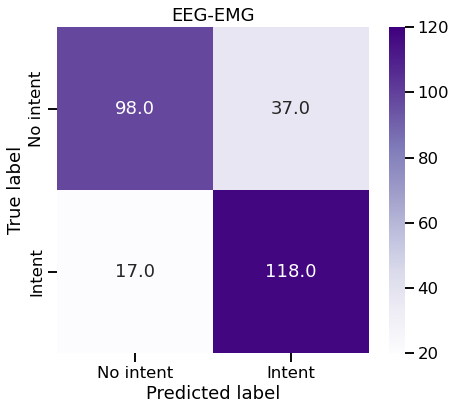

In [27]:
# Averaged confusion matrix
cm_eeg_emg = confusion_matrix(y_true=y_eeg_emg, y_pred=pred_y_eeg_emg)
#cm_emg_3 = confusion_matrix(y_true=yemg_3, y_pred=pred_y_emg_3)
figure(figsize=(7,6))
sns.set_context("talk")
ax = plt.axes()
c=sns.heatmap(cm_eeg_emg, ax = ax, annot=np.array([['%0.1f' % (cm_eeg_emg[0,0]),'%0.1f' % (cm_eeg_emg[0,1])],['%0.1f' % (cm_eeg_emg[1,0]),'%0.1f' % (cm_eeg_emg[1,1])]]), cmap='Purples', fmt="", vmin=20, vmax=120, xticklabels=["No intent", "Intent"], yticklabels=["No intent", "Intent"])
c.set_title('EEG-EMG')
plt.ylabel('True label')
plt.xlabel('Predicted label')

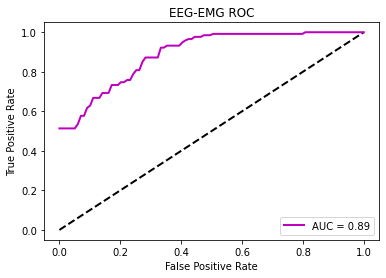

In [23]:
tprs_emg_11 = []
aucs_emg_11 = []
mean_fpr_emg_11 = np.linspace(0,1,100)
i = 1
for train,test in kfolds.split(X_eeg_emg,y_eeg_emg):
    prediction_emg_11 = clf_eeg_emg.fit(X_eeg_emg[train],y_eeg_emg[train]).predict_proba(X_eeg_emg[test])
    fpr_emg_11, tpr_emg_11, t_emg_11 = roc_curve(y_eeg_emg[test], prediction_emg_11[:, 1], pos_label=2.0)
    tprs_emg_11.append(np.interp(mean_fpr_emg_11, fpr_emg_11, tpr_emg_11))
    roc_auc_emg_11 = auc(fpr_emg_11, tpr_emg_11)
    aucs_emg_11.append(roc_auc_emg_11)
    i= i+1
  
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr_emg_11 = np.mean(tprs_emg_11, axis=0)
mean_auc_emg_11 = auc(mean_fpr_emg_11, mean_tpr_emg_11)
std_auc_emg_11 = np.std(aucs_emg_11)
plt.plot(mean_fpr_emg_11, mean_tpr_emg_11, color='m',
         label=r'AUC = %0.2f' % (mean_auc_emg_11),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('EEG-EMG ROC')
plt.legend(loc="lower right")

plt.show()